<h1>최종 EDA(미세먼지 + SNS)

각종 라이브러리 import

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import datetime
import glob
import os

In [2]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
# 노트북 안에 그래프를 그리기 위해
%matplotlib inline

# 그래프에서 격자로 숫자 범위가 눈에 잘 띄도록 ggplot 스타일을 사용
plt.style.use('ggplot')

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus'] = False

<h2>미세먼지 EDA 시작(같은 조원이 작성해둔 코드 일부 수정)
    
    1. 지역구 데이터에 존재하는 모든 데이터를 불러오기
    2. 각 데이터를 합친 후에 데이터 전처리
    3. 그래프로 표현

In [16]:
directory = "C:/Users/32141318/빅콘테스트/환경기상데이터/"

지역구에 들어있는 모든 csv 불러오기

In [17]:
read_file_jongro_lst = os.listdir('C:/Users/32141318/빅콘테스트/환경기상데이터/종로구/')
read_df_jongro_lst = []
print ("read_file_jongro_lst: {}".format(read_file_jongro_lst))

for f in read_file_jongro_lst:
    if f == '.ipynb_checkpoints':
        pass
    else :
        df_temp = pd.read_csv(directory + '종로구/' + f)
        read_df_jongro_lst.append(df_temp)

read_file_jongro_lst: ['V01o1610468.csv', 'V10O1610252.csv', 'V10O1610540.csv', 'V10O1610542.csv', 'V10O1610543.csv', 'V10O1610544.csv', 'V10O1610545.csv', 'V10O1610546.csv', 'V10O1610567.csv', 'V10O1611145.csv', 'V10O1611151.csv', 'V10O1611170.csv', 'V10O1611172.csv', 'V10O1611173.csv', 'V10O1611220.csv', 'V10O1611251.csv', 'V10O1611255.csv', 'V10O1611258.csv', 'V10O1611289.csv', 'V10O1611623.csv', 'V10O1611634.csv', 'V10O1611639.csv', 'V10O1611645.csv', 'V10O1611658.csv', 'V10O1611684.csv', 'V10O1611698.csv', 'V10O1611722.csv', 'V10O1611750.csv', 'V10O1611887.csv', 'V10O1612106.csv', 'V10O1612113.csv']


불러온 파일들 합치기

In [60]:
jongro = pd.concat(read_df_jongro_lst)

미세먼지 데이터 전처리

In [20]:
jongro["Year"] = jongro["tm"]
jongro["Month"] = jongro["tm"]
jongro["Days"] = jongro["tm"]
jongro["hours"] = jongro["tm"]
days = [int(str(mmdd)[6:8]) for mmdd in jongro["tm"]]
month = [int(str(mmdd)[4:6]) for mmdd in jongro["tm"]]
year = [int(str(mmdd)[0:4]) for mmdd in jongro["tm"]]
hours = [int(str(mmdd)[8:10]) for mmdd in jongro["tm"]]

jongro["Days"] = days
jongro["Year"] = year
jongro["Month"] = month
jongro["hours"] = hours
jongro.head()

,tm,serial,flag,pm10,co2,vocs,noise,temp,humi,pm25,Unnamed: 10,Year,Month,Days,hours
0,201804010000,V01o1610468,-999,-999,-999,-999,-999,-999.0,-999,NaN,NaN,2018,4,1,0
1,201804010001,V01o1610468,-999,-999,-999,-999,-999,-999.0,-999,NaN,NaN,2018,4,1,0
2,201804010002,V01o1610468,-999,-999,-999,-999,-999,-999.0,-999,NaN,NaN,2018,4,1,0
3,201804010003,V01o1610468,-999,-999,-999,-999,-999,-999.0,-999,NaN,NaN,2018,4,1,0
4,201804010004,V01o1610468,-999,-999,-999,-999,-999,-999.0,-999,NaN,NaN,2018,4,1,0


보기 편하도록 지역구를 수정해줌(다른 데이터들과 맞춰주기 위해서)

In [21]:
jongro_idx = ['가회동','종로 1,2,3,4가동','교남동','사직동','사직동','혜화동','혜화동','종로 1,2,3,4가동','청운효자동','종로 1,2,3,4가동','종로 1,2,3,4가동','종로 1,2,3,4가동','종로 1,2,3,4가동','종로 1,2,3,4가동','종로 1,2,3,4가동','종로 1,2,3,4가동','종로 1,2,3,4가동','숭인2동','부암동','이화동','천연동','종로 1,2,3,4가동','가회동','종로 1,2,3,4가동','가회동','종로5,6가동','창신3동','창신1동','창신1동','명동','평창동']
jongro_station = ['V10O1611722','V10O1611684','V10O1610252','V10O1611172','V01o1610468','V10O1611645','V10O1611623','V10O1611750','V10O1611255','V10O1610546','V10O1610540','V10O1610542','V10O1610543','V10O1610544','V10O1610545','V10O1610567','V10O1612113','V10O1612106','V10O1611170','V10O1611658','V10O1611289','V10O1611173','V10O1611698','V10O1611145','V10O1611634','V10O1611639','V10O1611251','V10O1611151','V10O1611220','V10O1611887','V10O1611258']

jongro_station_idx = dict(zip(jongro_station, jongro_idx))

for key in jongro_station_idx.keys():
    jongro['serial'] = np.where(jongro['serial'] == key, jongro_station_idx[key], jongro['serial'])

jongro.head()

,tm,serial,flag,pm10,co2,vocs,noise,temp,humi,pm25,Unnamed: 10,Year,Month,Days,hours
0,201804010000,사직동,-999,-999,-999,-999,-999,-999.0,-999,NaN,NaN,2018,4,1,0
1,201804010001,사직동,-999,-999,-999,-999,-999,-999.0,-999,NaN,NaN,2018,4,1,0
2,201804010002,사직동,-999,-999,-999,-999,-999,-999.0,-999,NaN,NaN,2018,4,1,0
3,201804010003,사직동,-999,-999,-999,-999,-999,-999.0,-999,NaN,NaN,2018,4,1,0
4,201804010004,사직동,-999,-999,-999,-999,-999,-999.0,-999,NaN,NaN,2018,4,1,0


In [22]:
jongro_copy = jongro

In [23]:
jongro_copy = jongro[['Year','Month','Days','hours','serial','pm10','pm25']]

결측치 + 이상치 확인 후 제거

In [25]:
jongro_copy.isnull().sum()

Year           0
Month          0
Days           0
hours          0
serial         0
pm10           0
pm25      571890
dtype: int64

In [54]:
jongro_copy[jongro_copy['pm25']< 0].sum()

NameError: name 'jongro_copy' is not defined

이상치를 결측지로 바꾼후 처리

In [27]:
jongro_copy.loc[jongro_copy['pm25'] < 0, 'pm25'] = None

C:\Users\32141318\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:480: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [28]:
jongro_copy.isnull().sum()

Year           0
Month          0
Days           0
hours          0
serial         0
pm10           0
pm25      595672
dtype: int64

In [29]:
jongro_copy.loc[jongro_copy['pm10'] < 0, 'pm10'] = np.nan

In [30]:
jongro_copy.isnull().sum()

Year           0
Month          0
Days           0
hours          0
serial         0
pm10      595672
pm25      595672
dtype: int64

In [31]:
jongro_copy2 = jongro_copy.copy()

결측치 제거

In [32]:
jongro_copy2 = jongro_copy2.dropna()

In [33]:
jongro_copy2.isnull().sum()

Year      0
Month     0
Days      0
hours     0
serial    0
pm10      0
pm25      0
dtype: int64

In [34]:
jongro_copy3 = jongro_copy2.groupby(['serial','Year', 'Month','Days','hours'])['pm25','pm10'].mean().astype(int)

In [38]:
jongro_copy3.to_csv('C:/Users/32141318/빅콘테스트/환경기상데이터/jongro.csv')

In [39]:
pre_jongro = pd.read_csv('C:/Users/32141318/빅콘테스트/환경기상데이터/jongro.csv')
pre_jongro

,serial,Year,Month,Days,hours,pm25,pm10
0,가회동,2018,4,1,0,28,54
1,가회동,2018,4,1,1,27,56
2,가회동,2018,4,1,2,27,58
3,가회동,2018,4,1,3,29,58
4,가회동,2018,4,1,4,28,54
5,가회동,2018,4,1,5,25,53
6,가회동,2018,4,1,6,26,55
7,가회동,2018,4,1,7,33,64
8,가회동,2018,4,1,8,31,59
9,가회동,2018,4,1,9,27,59


In [40]:
jongro_code = {11110515:'청운효자동', 11110530: '사직동', 11110540: '삼청동', 11110550: '부암동',11110560: '평창동', 11110570: "무악동", 11110580: '교남동', 11110600: '가회동', 11110615: '종로 1,2,3,4가동', 11110630: '종로5,6가동',11110640: "이화동", 11110650: '혜화동', 11110670: '창신1동', 11110680: '창신2동', 11110690: '창신3동', 11110700: '숭인1동', 11110710: '숭인2동'}

for key in jongro_code.keys():
    pre_jongro['serial'] = np.where(pre_jongro['serial'] == jongro_code[key], key, pre_jongro['serial'])

In [41]:
pre_jongro

,serial,Year,Month,Days,hours,pm25,pm10
0,11110600,2018,4,1,0,28,54
1,11110600,2018,4,1,1,27,56
2,11110600,2018,4,1,2,27,58
3,11110600,2018,4,1,3,29,58
4,11110600,2018,4,1,4,28,54
5,11110600,2018,4,1,5,25,53
6,11110600,2018,4,1,6,26,55
7,11110600,2018,4,1,7,33,64
8,11110600,2018,4,1,8,31,59
9,11110600,2018,4,1,9,27,59


In [42]:
#다른 데이터에서 일치하지 않는 행정동 행 제거
pre_jongro = pre_jongro[pre_jongro.serial != '명동']
pre_jongro = pre_jongro[pre_jongro.serial != '천연동']

In [43]:
pre_jongro.to_csv('pre_jongro.csv', index = False)
pre_jongro = pd.read_csv('pre_jongro.csv')
pre_jongro

,serial,Year,Month,Days,hours,pm25,pm10
0,11110600,2018,4,1,0,28,54
1,11110600,2018,4,1,1,27,56
2,11110600,2018,4,1,2,27,58
3,11110600,2018,4,1,3,29,58
4,11110600,2018,4,1,4,28,54
5,11110600,2018,4,1,5,25,53
6,11110600,2018,4,1,6,26,55
7,11110600,2018,4,1,7,33,64
8,11110600,2018,4,1,8,31,59
9,11110600,2018,4,1,9,27,59


지역구에 상관없이 각 데이터를 묶어줌(년 월 일 기준)

미세먼지와 초미세먼지는 시간대별로 데이터가 있으므로 평균을 내서 값을 넣어줌

In [44]:
df = pd.DataFrame(columns = ['Year', 'Month', 'Days', 'pm10', 'pm25'])
i=0
for (n1,n2,n3),group in pre_jongro.groupby(["Year","Month","Days"]):
    df.loc[i,['Year']]  = int(n1)
    df.loc[i,['Month']] = int(n2)
    df.loc[i,['Days']] = int(n3)
    a=group["pm10"].mean()
    b=group["pm25"].mean()
    df.loc[i,["pm10"]] = a
    df.loc[i,["pm25"]] = b
    i+=1

In [46]:
df = df.astype('int')

미세먼지와 초미세먼지를 국가 기준 등급표에 따라서 등급을 매겨주눈 코드

In [49]:
pre_jongro['pm10_quil'] = np.where(pre_jongro['pm10'] <= 30, '0', None)

In [50]:
def alert(c):
    if c['pm10'] <= 30:
        return 1
    elif c['pm10'] <= 80:
        return 2
    elif c['pm10'] <= 150:
        return 3
    else:
        return 4

pre_jongro['pm10_quil'] = pre_jongro.apply(alert, axis=1)


In [51]:
def alert(c):
    if c['pm25'] <= 15:
        return 1
    elif c['pm25'] <= 35:
        return 2
    elif c['pm25'] <= 75:
        return 3
    else:
        return 4

pre_jongro['pm25_quil'] = pre_jongro.apply(alert, axis=1)


In [53]:
df['pm10_quil'] = df.apply(alert, axis=1)
df['pm25_quil'] = df.apply(alert, axis=1)

In [67]:
df = df.astype('int')

csv파일로 저장해줌

In [55]:
df.to_csv('C:/Users/32141318/빅콘테스트/환경기상데이터/jongro 지역구 상관없이 일별로 미세먼지 , 초미세먼지 등급.csv')

In [73]:
df2 = pd.DataFrame(columns = ['Year', 'Month', 'pm10', 'pm25'])
i=0
for (n1,n2),group in pre_jongro.groupby(["Year","Month"]):
    df2.loc[i,['Year']]  = int(n1)
    df2.loc[i,['Month']] = int(n2)
    a=group["pm10"].mean()
    b=group["pm25"].mean()
    df2.loc[i,["pm10"]] = a
    df2.loc[i,["pm25"]] = b
    i+=1

In [75]:
df2 = df2.astype('int')

In [77]:
df2['pm10_quil'] = df2.apply(alert, axis=1)
df2['pm25_quil'] = df2.apply(alert, axis=1)

<h3>미세먼지 그래프
    
    1. 붉은색은 2018년 파란색은 2019년으로 총 1년치 데이터 표현
    2. 미세먼지와 초미세먼지는 서로 연관성을 가지고 있으며 평균 등급도 서로 같음을 위의 표를 통하여 알 수 있음
    3. 겨울에 미세먼지가 유독 높아진다는 것을 알 수 있다.

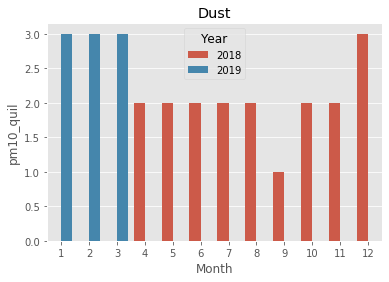

In [85]:
#x축:월 y축: 등급
#데이터 시각화
sns.barplot(x="Month", y="pm10_quil", hue="Year", data=df2)
plt.title("Dust")
plt.show()

<h2>SNS 데이터 EDA

In [3]:
directory = "C:/Users/32141318/빅콘테스트/SNS데이터/블로그/"

sns에서 블로그글만 따로 추출하여 한번에 가지고오기

(뉴스를 제외한 이유는 뉴스는 공적인 내용이 커 일반 시민들의 반응을 알기 어렵고 sns데이터는 크기가 크기때문에 나눠줘야할 필요성이 있음)

In [4]:
read_file_blog_lst = os.listdir('C:/Users/32141318/빅콘테스트/SNS데이터/블로그/블로그/')
read_df_blog_lst = []
print ("read_file_blog_lst: {}".format(read_file_blog_lst))

for f in read_file_blog_lst:
    if f == '.ipynb_checkpoints':
        pass
    else :
        df_temp = pd.read_csv(directory + '블로그/' + f)
        read_df_blog_lst.append(df_temp)

read_file_blog_lst: ['SNS1 블로그만.csv', 'SNS2 블로그만.csv', 'SNS3 블로그만.csv', 'SNS4 블로그만.csv', 'SNS5 블로그만.csv', 'SNS6 블로그만.csv', 'SNS7 블로그만.csv', 'SNS8 블로그만.csv']


In [5]:
blog = pd.concat(read_df_blog_lst)

In [6]:
blog.head()

,DOCID,SECTION,DATE,TITLE,CONTENT
0,204172453,블로그,2018-11-02 23:59:00,신동탄 이안파밀리에 눈에 보이는 프리미엄 진짜네요,분 양 정 보 신동탄 이안파밀리에 눈에 보이는 프리미엄 진짜네요 유쾌한 분양킴 2...
1,204172474,블로그,2018-11-02 23:57:00,느린 점심點心,생활 속의 단상 느린 점심點心 묘광거사 2018 11 2 2357 URL 복사 이...
2,204172506,블로그,2018-11-02 23:54:00,한화 태양의 숲 조성으로 미세먼지도 막고 환경도 지켜요,한화프렌즈 한화 태양의 숲 조성으로 미세먼지도 막고 환경도 지켜요 아르엘 2018...
3,204172546,블로그,2018-11-02 23:54:00,섬유유연제추천 미세먼지까지 잡아 주는 착한 샤프란 섬유유연제 quot; 꽃담초 quot;,쇼핑 섬유유연제추천 미세먼지까지 잡아 주는 착한 샤프란 섬유유연제 꽃담초 요미요...
4,204172587,블로그,2018-11-02 23:52:00,핑거루트 허브 다이어트 남자 몸매관리 후기,리뷰 핑거루트 허브 다이어트 남자 몸매관리 후기 김종성유통 2018 11 2 23...


<h3> SNS데이터 전처리
    
    1. 불필요한 열 제거
    2. 월별로 나누어서 파악하기 위해 데이터타임 라이브러리 이용해서 전처리
    3. 결측치 제거후 각 해당하는 월에 키워드를 확인하기 위해 Okt사용한 후 Counter를 사용하여 많이 나온 명사 파악

In [7]:
del blog['DOCID']
del blog['SECTION']

In [8]:
#DATE를 Datetime으로 바꾸기
blog['DATE']=pd.to_datetime(blog['DATE'])

In [9]:
blog['month'] = blog['DATE'].dt.strftime('%m')

In [10]:
blog.head()

,DATE,TITLE,CONTENT,month
0,2018-11-02 23:59:00,신동탄 이안파밀리에 눈에 보이는 프리미엄 진짜네요,분 양 정 보 신동탄 이안파밀리에 눈에 보이는 프리미엄 진짜네요 유쾌한 분양킴 2...,11
1,2018-11-02 23:57:00,느린 점심點心,생활 속의 단상 느린 점심點心 묘광거사 2018 11 2 2357 URL 복사 이...,11
2,2018-11-02 23:54:00,한화 태양의 숲 조성으로 미세먼지도 막고 환경도 지켜요,한화프렌즈 한화 태양의 숲 조성으로 미세먼지도 막고 환경도 지켜요 아르엘 2018...,11
3,2018-11-02 23:54:00,섬유유연제추천 미세먼지까지 잡아 주는 착한 샤프란 섬유유연제 quot; 꽃담초 quot;,쇼핑 섬유유연제추천 미세먼지까지 잡아 주는 착한 샤프란 섬유유연제 꽃담초 요미요...,11
4,2018-11-02 23:52:00,핑거루트 허브 다이어트 남자 몸매관리 후기,리뷰 핑거루트 허브 다이어트 남자 몸매관리 후기 김종성유통 2018 11 2 23...,11


In [11]:
#CONTENT에 결측값 제거하기
blog=blog.dropna(axis=0)

아래 코드를 통해 각 월에 해당하는 데이터만 추출

In [83]:
blog_5 = blog.copy()
blog_5_2 = blog_5.loc[blog_5['month'].values == '05']

In [84]:
blog_5_2

,DATE,TITLE,CONTENT,month
9092,2018-05-16 23:59:00,5월 16일 수요일,미세면지친환경 5월 16일 수요일 남수현 2018 5 16 2359 URL 복사 ...,05
9093,2018-05-16 23:59:00,직장인을 위한 야간진료 피부관리는 70싼 가격으로 로하셀 VFC,한방다이어트 직장인을 위한 야간진료 피부관리는 70싼 가격으로 로하셀 VFC 지혜...,05
9094,2018-05-16 23:59:00,여수 해상케이블카 오동도,여수 해상 케이블카 바다위를 지나 섬과 육지를 연결하는 케이블카입니다 네비 ...,05
9095,2018-05-16 23:59:00,분당 병원 에어컨 분해 청소천정형에어컨분해청소에어컨속 오염에어컨냄새 곰팡이,에어컨 분해 세척 분당 병원 에어컨 분해 청소천정형에어컨분해청소에어컨속 오염에어컨냄...,05
9096,2018-05-16 23:58:00,엘컨30대수분에센스 퍼펙트 오거나이징 액티비티 리페어,뷰티 엘컨30대수분에센스 퍼펙트 오거나이징 액티비티 리페어 콩미니 2018 5 1...,05
9097,2018-05-16 23:57:00,핸드폰 사진털기 선거철인가 치킨 4끼 고양이 간식 달리치약,동네에 핀 꽃 도로정비공사도 많이 하시고 지난달엔 마을잔치도 열렸다 선거철이라 미리...,05
9098,2018-05-16 23:57:00,헬반도의 여름은 사람이 살 곳이 못된다,원래 안그랬는데 이젠 증말 여름이 겁이 난다 항상 봄에 운동시작해서 여름에 운동을 ...,05
9099,2018-05-16 23:53:00,얼굴U라인 다델구오세요 V라인으로만들어드립니다 30싼곳 BLV,일기 얼굴U라인 다델구오세요 V라인으로만들어드립니다 30싼곳 BLV 만듀 201...,05
9100,2018-05-16 23:51:00,꽃파는 소년,꽃파는 소년 낙엽 소년을 그리다가 그리게 된 작업물 ㅋㅋ 집에 식물을 두고 싶은데 ...,05
9101,2018-05-16 23:51:00,피부장벽 재건법,뷰티n헬스 피부장벽 재건법 강인숙에스테틱 2018 5 16 2351 URL 복사 ...,05


In [110]:
blog_low = blog.copy()
blog_low2 = blog_low.loc[blog_low['month'].values == '10']
blog_low2 = blog_low2.append(blog_low.loc[blog_low['month'].values == '09'])
blog_low2 = blog_low2.append(blog_low.loc[blog_low['month'].values == '08'])
blog_low2 = blog_low2.append(blog_low.loc[blog_low['month'].values == '07'])
blog_low2 = blog_low2.append(blog_low.loc[blog_low['month'].values == '06'])
blog_low2 = blog_low2.append(blog_low.loc[blog_low['month'].values == '05'])

In [111]:
blog_high = blog.copy()
blog_high2 = blog_high.loc[blog_high['month'].values == '04']
blog_high2 = blog_high2.append(blog_high.loc[blog_high['month'].values == '01'])
blog_high2 = blog_high2.append(blog_high.loc[blog_high['month'].values == '02'])
blog_high2 = blog_high2.append(blog_high.loc[blog_high['month'].values == '03'])
blog_high2 = blog_high2.append(blog_high.loc[blog_high['month'].values == '11'])
blog_high2 = blog_high2.append(blog_high.loc[blog_high['month'].values == '12'])

In [17]:
import matplotlib.pyplot as plt, matplotlib as mpl
from sklearn.decomposition import PCA
from pylab import rcParams
from konlpy.tag import Okt
import re
import json
import re
from collections import Counter
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import font_manager, rc
import pytagcloud
import webbrowser

pygame 1.9.6
Hello from the pygame community. https://www.pygame.org/contribute.html


In [85]:
blog_5_2 = blog_5_2.reset_index()

데이터가 많으므로 각 월에 해당하는 데이터중 상위 5000개만 추출하여서 분석

Okt를 사용하여서 형태소 분석 후 Counter를 이용하여 개수 측정

In [86]:
blog_5_2 = blog_5_2.head(5000)

In [87]:
strr_5 = ""
nlp = Okt()
#str_list = []
for i in range(len(blog_5_2)):
    #strr = ""
    strr_5 += blog_5_2.iloc[:,3][i]
    
    #nouns = nlp.nouns(strr)
    #count = Counter(nouns)
    #str_list.append(count)

In [88]:
#okt 사용해서 형태소 분석
nouns_5 = nlp.nouns(strr_5)
#print nouns

#그 이후 Counter 사용해서 개수 count
count_5 = Counter(nouns_5)
print(count_5)

Counter({'미세먼지': 9938, '수': 8249, '것': 8107, '피부': 7450, '곳': 7403, '보기': 6242, '기능': 6117, '역': 5182, '때': 4970, '사용': 4811, '이': 4691, '추가': 4672, '더': 4640, '날': 4415, '이웃': 4410, '살': 4380, '등': 4302, '기타': 4281, '번역': 4221, '본문': 4210, '복사': 4201, '제품': 3918, '아이': 3684, '사진': 3463, '집': 3371, '위': 3324, '내': 3259, '오늘': 3155, '후': 3150, '관리': 3111, '우리': 3053, '약': 2988, '저': 2983, '나': 2981, '법': 2978, '추천': 2947, '마스크': 2844, '비': 2784, '생각': 2774, '때문': 2742, '시간': 2615, '정말': 2579, '물': 2567, '얼굴': 2556, '제': 2519, '눈': 2513, '그': 2510, '제거': 2499, '차': 2490, '효과': 2485, '사람': 2480, '볼': 2421, '가격': 2396, '요즘': 2383, '중': 2316, '목': 2287, '청소': 2278, '코': 2276, '또': 2247, '전': 2218, '카페': 2214, '라인': 2180, '개선': 2175, '케어': 2136, '팩': 2127, '방': 2122, '안': 2120, '치료': 2089, '거': 2058, '성분': 2030, '하나': 2011, '서울': 1981, '바로': 1954, '날씨': 1952, '비용': 1924, '정도': 1886, '저장': 1886, '엄마': 1874, '체험': 1866, '방법': 1865, '음식': 1832, '해': 1827, '요': 1819, '및': 1809, '여행': 1803, '화장품'

그래프 그리기(수정)

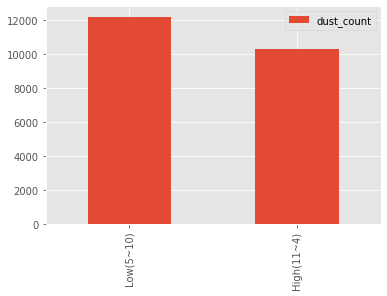

In [142]:
matrix = np.matrix([[12214] ,[10280]])

df = pd.DataFrame([[12214] ,[10280]], columns = ["dust_count"] , index = ["Low(5~10)","High(11~4)"])

%matplotlib inline

df.plot.bar()